<a href="https://colab.research.google.com/github/hassineimen/gestionCV/blob/main/CV_employ%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1/ Analyse de la base de données.

In [ ]:
import pandas as pd
# Chemin du fichier (assurez-vous de l'avoir téléchargé dans Colab ou sur Google Drive)
file_path = '/content/CV_employée.csv'

# Lire le fichier CSV avec le délimiteur '|'
df = pd.read_csv(file_path , delimiter='|')

In [ ]:
#le nombre de lignes de la base
print(len(df))


20000


In [ ]:
print(df.head())

     Nom Prénom                 Email  Numéro_Téléphone            Adresse  \
0  PESDX  DUSVQ  3CB3E318@example.com      6.618846e+07  849324AA-5 Street   
1  TEJYP  IGENA  5F1296A5@example.com      6.501537e+09  44642BC9-B Street   
2  WDZLQ  EKHMI  C1BF5D4B@example.com      6.724430e+09  2FFB8F44-1 Street   
3  VRRSW  RRKTD  B9E6AAF4@example.com      6.171405e+09  7BE60A85-F Street   
4  EYUCR  QQNJB  34950D39@example.com      6.206555e+09  FBC75267-4 Street   

  Date_de_naissance   Sexe   État_civil Nationalité             Langues  \
0        1986-01-21  Femme  Célibataire    Anglaise  Français, Espagnol   
1        1974-01-21  Homme  Célibataire   Française   Anglais, Allemand   
2        1966-01-21  Homme     Marié(e)   Française  Français, Espagnol   
3        1967-01-21  Homme   Divorcé(e)    Anglaise   Anglais, Allemand   
4        1997-01-21  Autre  Célibataire    Anglaise  Français, Espagnol   

   Diplôme  Année_diplôme                 Établissement  \
0  Licence           

In [ ]:
print(df['Langues'].head())

0    Français, Espagnol
1     Anglais, Allemand
2    Français, Espagnol
3     Anglais, Allemand
4    Français, Espagnol
Name: Langues, dtype: object


In [ ]:
print(df.dtypes)

Nom                            object
Prénom                         object
Email                          object
Numéro_Téléphone              float64
Adresse                        object
Date_de_naissance              object
Sexe                           object
État_civil                     object
Nationalité                    object
Langues                        object
Diplôme                        object
Année_diplôme                   int64
Établissement                  object
Expérience_professionnelle     object
Certifications                 object
Compétences                    object
dtype: object


In [ ]:
#vérifier les données manquantes ou nulles
print(df.isnull().sum())


Nom                           0
Prénom                        0
Email                         0
Numéro_Téléphone              0
Adresse                       0
Date_de_naissance             0
Sexe                          0
État_civil                    0
Nationalité                   0
Langues                       0
Diplôme                       0
Année_diplôme                 0
Établissement                 0
Expérience_professionnelle    0
Certifications                0
Compétences                   0
dtype: int64


In [ ]:
#vérifier l'équilibre des catégories dans la colonne Compétences
print(df['Compétences'].value_counts())
#Vérifier la distribution des valeurs uniques dans les colonnes catégorielles
print(df['Compétences'].unique())



Compétences
Développement    6736
Marketing        6695
Gestion          6569
Name: count, dtype: int64
['Marketing' 'Gestion' 'Développement']


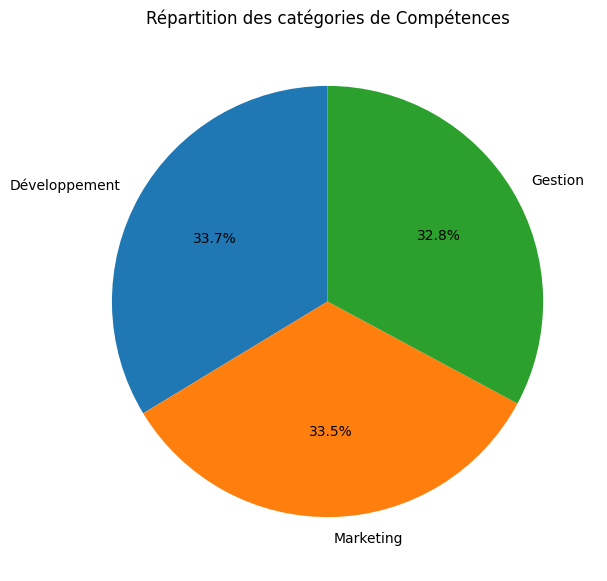

In [ ]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque catégorie
competences_counts = df['Compétences'].value_counts()

# Créer un graphique circulaire
competences_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(7, 7))

# Afficher le graphique
plt.title('Répartition des catégories de Compétences')
plt.ylabel('')  # Supprimer le label de l'axe y
plt.show()


In [ ]:
#Analyser les statistiques descriptives pour identifier des valeurs aberrantes
print(df.describe())


       Numéro_Téléphone  Année_diplôme
count      2.000000e+04   20000.000000
mean       5.963524e+09    2009.933300
std        1.791577e+09       6.046807
min        6.556820e+05    2000.000000
25%        6.251797e+09    2005.000000
50%        6.501047e+09    2010.000000
75%        6.752922e+09    2015.000000
max        6.999942e+09    2020.000000


## 2/Prétraitement des données.

In [ ]:
#convertir toutes les lettres en minuscules
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


<ipython-input-10-0b2880d07cd2>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
df.head()

,Nom,Prénom,Email,Numéro_Téléphone,Adresse,Date_de_naissance,Sexe,État_civil,Nationalité,Langues,Diplôme,Année_diplôme,Établissement,Expérience_professionnelle,Certifications,Compétences
0,pesdx,dusvq,3cb3e318@example.com,6.618846e+07,849324aa-5 street,1986-01-21,femme,célibataire,anglaise,"français, espagnol",licence,2011,université lyon,analyste à tech solutions,certification scrum master,marketing
1,tejyp,igena,5f1296a5@example.com,6.501537e+09,44642bc9-b street,1974-01-21,homme,célibataire,française,"anglais, allemand",licence,2004,université lyon,développeur web à abc corp,formation java,gestion
2,wdzlq,ekhmi,c1bf5d4b@example.com,6.724430e+09,2ffb8f44-1 street,1966-01-21,homme,marié(e),française,"français, espagnol",licence,2008,université lyon,chef de projet à xyz inc.,certifié itil,marketing
3,vrrsw,rrktd,b9e6aaf4@example.com,6.171405e+09,7be60a85-f street,1967-01-21,homme,divorcé(e),anglaise,"anglais, allemand",master,2008,école supérieure de commerce,analyste à tech solutions,certifié itil,développement
4,eyucr,qqnjb,34950d39@example.com,6.206555e+09,fbc75267-4 street,1997-01-21,autre,célibataire,anglaise,"français, espagnol",master,2012,université lyon,chef de projet à xyz inc.,certifié itil,gestion


In [ ]:
#supprimer les caractères spéciaux sauf les espaces
df = df.applymap(lambda x: ''.join(e for e in x if e.isalnum() or e.isspace()) if isinstance(x, str) else x)


<ipython-input-12-b2e1c0a4b075>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: ''.join(e for e in x if e.isalnum() or e.isspace()) if isinstance(x, str) else x)


In [ ]:
df.head()

,Nom,Prénom,Email,Numéro_Téléphone,Adresse,Date_de_naissance,Sexe,État_civil,Nationalité,Langues,Diplôme,Année_diplôme,Établissement,Expérience_professionnelle,Certifications,Compétences
0,pesdx,dusvq,3cb3e318examplecom,6.618846e+07,849324aa5 street,19860121,femme,célibataire,anglaise,français espagnol,licence,2011,université lyon,analyste à tech solutions,certification scrum master,marketing
1,tejyp,igena,5f1296a5examplecom,6.501537e+09,44642bc9b street,19740121,homme,célibataire,française,anglais allemand,licence,2004,université lyon,développeur web à abc corp,formation java,gestion
2,wdzlq,ekhmi,c1bf5d4bexamplecom,6.724430e+09,2ffb8f441 street,19660121,homme,mariée,française,français espagnol,licence,2008,université lyon,chef de projet à xyz inc,certifié itil,marketing
3,vrrsw,rrktd,b9e6aaf4examplecom,6.171405e+09,7be60a85f street,19670121,homme,divorcée,anglaise,anglais allemand,master,2008,école supérieure de commerce,analyste à tech solutions,certifié itil,développement
4,eyucr,qqnjb,34950d39examplecom,6.206555e+09,fbc752674 street,19970121,autre,célibataire,anglaise,français espagnol,master,2012,université lyon,chef de projet à xyz inc,certifié itil,gestion


In [ ]:
#supprimer les stopwords (de ,la,le,dans,sur,que,à,pour,qui,en,avec,un )
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))

df = df.applymap(lambda x: ' '.join([word for word in x.split() if word not in stop_words]) if isinstance(x, str) else x)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-14-9b6f03283bf2>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: ' '.join([word for word in x.split() if word not in stop_words]) if isinstance(x, str) else x)


In [ ]:
df.head()

,Nom,Prénom,Email,Numéro_Téléphone,Adresse,Date_de_naissance,Sexe,État_civil,Nationalité,Langues,Diplôme,Année_diplôme,Établissement,Expérience_professionnelle,Certifications,Compétences
0,pesdx,dusvq,3cb3e318examplecom,6.618846e+07,849324aa5 street,19860121,femme,célibataire,anglaise,français espagnol,licence,2011,université lyon,analyste tech solutions,certification scrum master,marketing
1,tejyp,igena,5f1296a5examplecom,6.501537e+09,44642bc9b street,19740121,homme,célibataire,française,anglais allemand,licence,2004,université lyon,développeur web abc corp,formation java,gestion
2,wdzlq,ekhmi,c1bf5d4bexamplecom,6.724430e+09,2ffb8f441 street,19660121,homme,mariée,française,français espagnol,licence,2008,université lyon,chef projet xyz inc,certifié itil,marketing
3,vrrsw,rrktd,b9e6aaf4examplecom,6.171405e+09,7be60a85f street,19670121,homme,divorcée,anglaise,anglais allemand,master,2008,école supérieure commerce,analyste tech solutions,certifié itil,développement
4,eyucr,qqnjb,34950d39examplecom,6.206555e+09,fbc752674 street,19970121,autre,célibataire,anglaise,français espagnol,master,2012,université lyon,chef projet xyz inc,certifié itil,gestion


In [ ]:
#Appliquer la lemmatisation
!pip install spacy
!python -m spacy download fr_core_news_sm
import spacy

# Charger le modèle français
nlp = spacy.load('fr_core_news_sm')

# Fonction de lemmatisation
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Appliquer la lemmatisation à toutes les colonnes textuelles
df = df.applymap(lambda x: lemmatize_text(x) if isinstance(x, str) else x)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 81.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


<ipython-input-16-a54496776982>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: lemmatize_text(x) if isinstance(x, str) else x)


In [ ]:
df.head()

,Nom,Prénom,Email,Numéro_Téléphone,Adresse,Date_de_naissance,Sexe,État_civil,Nationalité,Langues,Diplôme,Année_diplôme,Établissement,Expérience_professionnelle,Certifications,Compétences
0,pesdx,dusvq,3cb3e318examplecom,6.618846e+07,849324aa5 street,19860121,femme,célibataire,anglaise,français espagnol,licence,2011,université lyon,analyst tech solutier,certification scrum master,marketing
1,tejyp,igener,5f1296a5examplecom,6.501537e+09,44642bc9b street,19740121,homme,célibataire,français,anglais allemand,licence,2004,université lyon,développeur web abc corp,formation java,gestion
2,wdzlq,ekhmi,c1bf5d4bexamplecom,6.724430e+09,2ffb8f441 street,19660121,homme,marier,français,français espagnol,licence,2008,université lyon,chef projet xyz inc,certifier itil,marketing
3,vrrsw,rrktd,b9e6aaf4examplecom,6.171405e+09,7be60a85f street,19670121,homme,divorcé,anglaise,anglais allemand,master,2008,école supérieur commerce,analyst tech solutier,certifier itil,développement
4,eyucr,qqnjb,34950d39examplecom,6.206555e+09,fbc752674 street,19970121,autre,célibataire,anglaise,français espagnol,master,2012,université lyon,chef projet xyz inc,certifier itil,gestion


3/

In [ ]:
# Installer la bibliothèque transformers
!pip install transformers

# Importer les bibliothèques nécessaires
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch

# Charger le tokenizer XLNet
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

# Fonction pour tokenizer les données
def tokenize_data(text):
    return tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")

# Appliquer la tokenisation sur la colonne 'Expérience_professionnelle'
tokens = df['Expérience_professionnelle'].apply(lambda x: tokenize_data(x))

# Afficher les premières lignes après la tokenisation
print(tokens.head())

0    [input_ids, token_type_ids, attention_mask]
1    [input_ids, token_type_ids, attention_mask]
2    [input_ids, token_type_ids, attention_mask]
3    [input_ids, token_type_ids, attention_mask]
4    [input_ids, token_type_ids, attention_mask]
Name: Expérience_professionnelle, dtype: object


In [ ]:
# Convertir la colonne des labels 'Compétences' en valeurs numériques
labels_map = {'gestion': 0, 'marketing': 1, 'développement': 2}
df['labels'] = df['Compétences'].map(labels_map)
# Afficher les 5 premières lignes de la colonne 'Compétences' et 'labels'
print(df[['Compétences', 'labels']].head())

# Afficher la répartition des valeurs des labels
print(df['labels'].value_counts())

     Compétences  labels
0      marketing       1
1        gestion       0
2      marketing       1
3  développement       2
4        gestion       0
labels
2    6736
1    6695
0    6569
Name: count, dtype: int64


In [ ]:
from torch.nn.utils.rnn import pad_sequence

# Créer des jeux de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(tokens, df['labels'], test_size=0.2, random_state=42)

# Charger le modèle XLNet pour la classification
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=3)

# Définir l'optimiseur et la fonction de perte
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Appliquer un padding pour uniformiser les tailles des séquences
train_inputs = pad_sequence([x['input_ids'].squeeze(0) for x in X_train], batch_first=True)
test_inputs = pad_sequence([x['input_ids'].squeeze(0) for x in X_test], batch_first=True)

# Créer des masques d'attention (attention_mask) avec padding
train_attention_mask = pad_sequence([x['attention_mask'].squeeze(0) for x in X_train], batch_first=True)
test_attention_mask = pad_sequence([x['attention_mask'].squeeze(0) for x in X_test], batch_first=True)

# Convertir les labels en tenseurs
train_labels = torch.tensor(y_train.values)
test_labels = torch.tensor(y_test.values)


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
